<a href="https://www.kaggle.com/code/eavprog/abscur-sharp?scriptVersionId=124951392" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг валют по абсолютным курсам и коэффициенту Шарпа 



In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import abscur_menu
import abscur_post as ap

# меню проекта
abscur_menu.print_menu()

# загружаем историю абсолютных курсов
abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=True)

# загружаем расшифровки для валют
cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

img_cnt = 0
tabs = []
period = []

# код взять со страницы https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python
# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

def rep(per,title_per):
    from IPython.display import Markdown, display
    
    global img_cnt,tabs,period
    
    display(Markdown("# За "+title_per))
    
    data_abs = abscur.copy()
    date_start = data_abs.asfreq(freq="D").index[-per]
    date_finish = data_abs.index[-1]
    res = sharpe_ratio(abscur[abscur.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг валют по абсолютному курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    
    plt.savefig(str(img_cnt) + ".png")
    img_cnt += 1
    
    plt.show()
    
    def make_clickable(val):
        if val == '...':
            return '...'
        return '<a target="_blank" href="{}">Wikipedia link</a>'.format(val)
    
    res = pd.DataFrame(res,index = res.index)
    res.columns = ['коэф.Шарпа']
    
    res = res.merge(cur_ras,left_index=True,right_index=True)
    
    res = pd.concat([res.iloc[:3,:],pd.DataFrame([{res.columns[0]: '...', 'Расшифровка':'...','Ссылка на Wikipedia':'...'}],index=['...']),res.iloc[-3:,:]]).style.format({'Ссылка на Wikipedia': make_clickable})
    
    tabs.append(res)
    period.append(title_per)
    
    return res

# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/u/262921-aleksey-enin)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

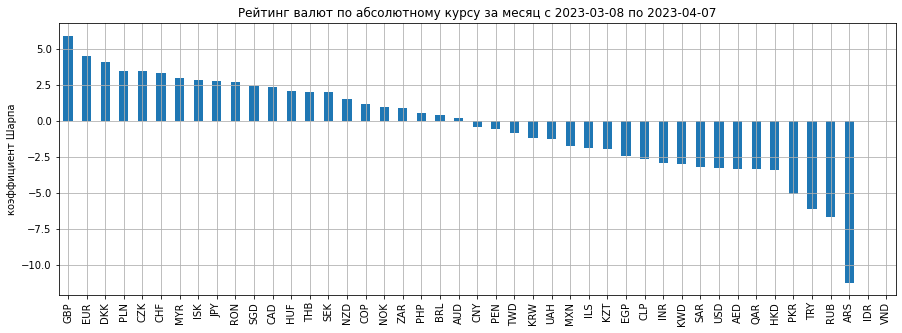

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
GBP,5.927591,Фунт стерлингов,Wikipedia link
EUR,4.514790,Евро,Wikipedia link
DKK,4.081451,Датская крона,Wikipedia link
...,...,...,...
ARS,-11.260959,Аргентинское песо,Wikipedia link
IDR,-inf,Индонезийская рупия,Wikipedia link
VND,-inf,Вьетнамский донг,Wikipedia link


In [2]:
rep(31,"месяц")

# За квартал

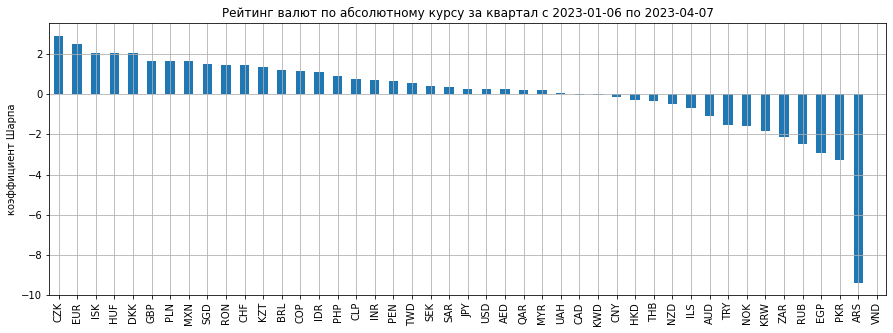

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
CZK,2.929576,Чешская крона,Wikipedia link
EUR,2.488029,Евро,Wikipedia link
ISK,2.067120,Исландская крона,Wikipedia link
...,...,...,...
PKR,-3.290861,Пакистанская рупия,Wikipedia link
ARS,-9.394215,Аргентинское песо,Wikipedia link
VND,-inf,Вьетнамский донг,Wikipedia link


In [3]:
rep(92,"квартал")

# За полгода

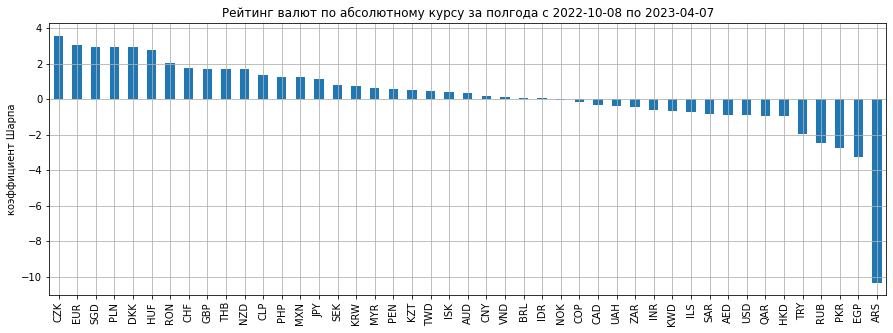

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
CZK,3.581075,Чешская крона,Wikipedia link
EUR,3.062989,Евро,Wikipedia link
SGD,2.945384,Сингапурский доллар,Wikipedia link
...,...,...,...
PKR,-2.747112,Пакистанская рупия,Wikipedia link
EGP,-3.221693,Египетский фунт,Wikipedia link
ARS,-10.321791,Аргентинское песо,Wikipedia link


In [4]:
rep(182,"полгода")

# За год

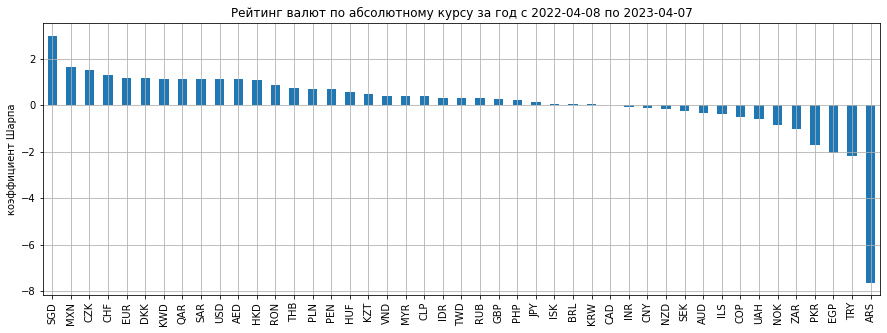

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,3.002692,Сингапурский доллар,Wikipedia link
MXN,1.667024,Мексиканское песо,Wikipedia link
CZK,1.506820,Чешская крона,Wikipedia link
...,...,...,...
EGP,-2.038278,Египетский фунт,Wikipedia link
TRY,-2.173028,Турецкая лира,Wikipedia link
ARS,-7.637860,Аргентинское песо,Wikipedia link


In [5]:
rep(1*365,"год")

# За 2 года

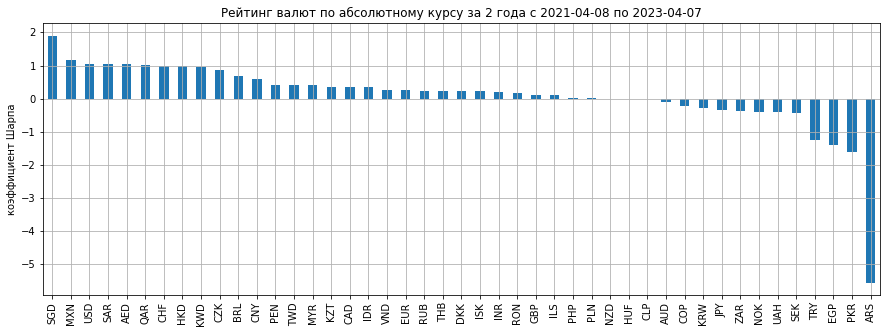

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,1.903506,Сингапурский доллар,Wikipedia link
MXN,1.157155,Мексиканское песо,Wikipedia link
USD,1.039462,Доллар США,Wikipedia link
...,...,...,...
EGP,-1.414237,Египетский фунт,Wikipedia link
PKR,-1.604841,Пакистанская рупия,Wikipedia link
ARS,-5.561373,Аргентинское песо,Wikipedia link


In [6]:
rep(2*365,"2 года")

# За 3 года

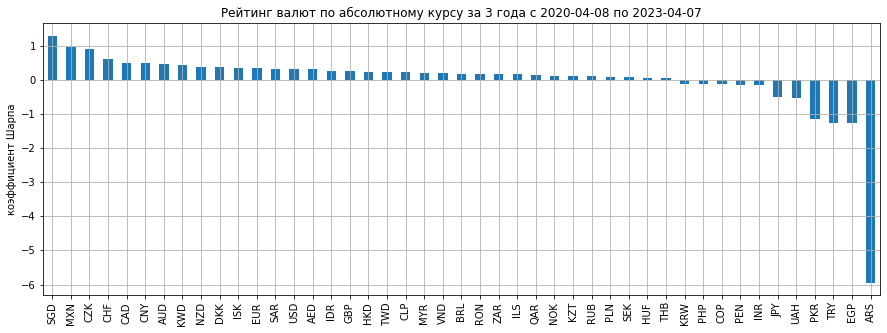

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,1.304037,Сингапурский доллар,Wikipedia link
MXN,0.973125,Мексиканское песо,Wikipedia link
CZK,0.922704,Чешская крона,Wikipedia link
...,...,...,...
TRY,-1.249944,Турецкая лира,Wikipedia link
EGP,-1.255212,Египетский фунт,Wikipedia link
ARS,-5.946085,Аргентинское песо,Wikipedia link


In [7]:
rep(3*365,"3 года")

# За 5 лет

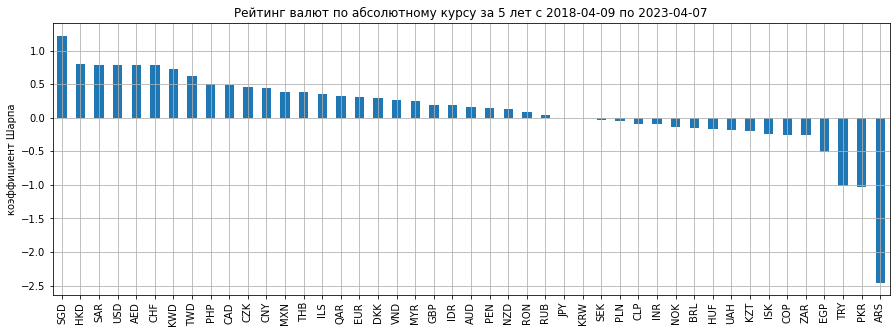

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,1.228411,Сингапурский доллар,Wikipedia link
HKD,0.801810,Гонконгский доллар,Wikipedia link
SAR,0.791155,Саудовский риял,Wikipedia link
...,...,...,...
TRY,-1.015723,Турецкая лира,Wikipedia link
PKR,-1.033077,Пакистанская рупия,Wikipedia link
ARS,-2.457983,Аргентинское песо,Wikipedia link


In [8]:
rep(5*365,"5 лет")

In [10]:
import numpy as np

num = np.random.randint(img_cnt)
text = f"За {period[num]} более всего были выгодны для вложения (самый большой коэффициент Шарпа для абсолютных курсов) такие валюты как {tabs[num].data.iloc[0,1]}, {tabs[num].data.iloc[1,1]} и {tabs[num].data.iloc[2,1]}. Менее всех выгодны для вложения (самый маленький коэффициент Шарпа для абсолютных курсов) были такие валюты как {tabs[num].data.iloc[-1,1]}, {tabs[num].data.iloc[-2,1]} и {tabs[num].data.iloc[-3,1]}."
text += "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-sharp"
img_file = str(num) + ".png"
ap.send_img_and_text(img_file,text)
